In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [69]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [70]:
# Looks like a regression problem. We have the median(?) house value for each of 20,640 households.

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

In [ ]:
# we're going to want to scale our data, but we're not sure which one to use. 

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# EDA

In [71]:
X # 37.88 lat, -122.23 long  is near Berkeley, California

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


We're given location data in the form of lat/lon columns; but it appears that this data has already been scaled;

without context it's difficult to identify MedInc and the median income, given the single digit values.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='MedInc', ylabel='Count'>

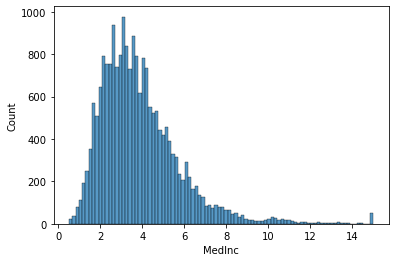

In [76]:
sns.histplot(X['MedInc'])

Oh, cool. It looks like someone has already (log?-)transformed this column. What about the rest of them? Let's make a function to find out. 


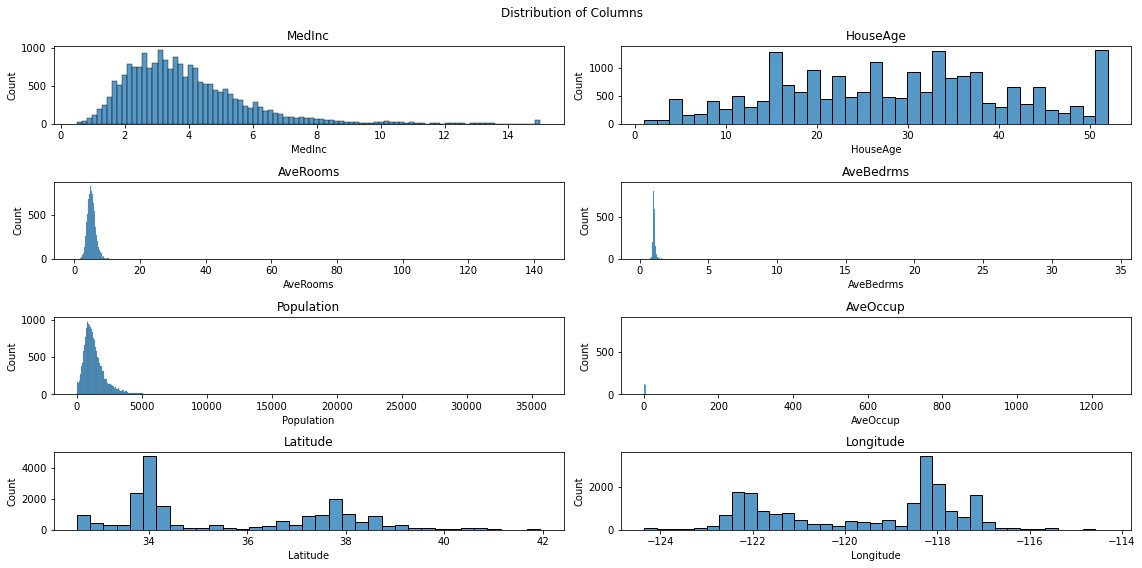

In [87]:
def plot_distributions_of_columns(X, title="Distribution of Columns", num_cols=2, all_numeric=True):
    plottable_columns = X.columns
    no_graphs = len(plottable_columns)
    
    if no_graphs % 2 == 0:
        num_rows = no_graphs//num_cols
    else:
        num_rows = (no_graphs//num_cols) + 1
        
        
    plt.subplots(num_rows, no_cols, figsize=(16,8))
    plt.suptitle(title)
    for idx, col in enumerate(X):
        plt.subplot(num_rows, num_cols, idx+1)
        plt.title(f'{col}')
        sns.histplot(X[col])
    
    plt.tight_layout()
    plt.show() # could be modified to output the results to a file
    
if __name__ == "__main__":
    plot_distributions_of_columns(X)

There's definitely a little bit more exploring to do here. It looks like we might have hit a boundary of some sort on the HouseAge column. We need to do some outlier protection/investigation with regards to the scaling on the middle 4 columns.

Latitude and Longitude are within the ranges that we would expect ? (check this)

Population values. This must be for different municipalities in California. While we do seem to have some serious outliers, we might actually be looking at distinct groups -- a city like Los Angeles or San Fransisco is going to rate differently than a small town on major comparitive metrics. 

This could indicate the existence of separate "populations" or underlying groups in our data..?

## Pipeline

The Pipeline() object is effectively a container for a series of progressive steps, through "transformers".

`steps : list
    List of (name, transform) tuples (implementing fit/transform) that are
    chained, in the order in which they are chained, with the last object
    an estimator.`


In [62]:
estimators = [model]
scalers = [MinMaxScaler, StandardScaler]

In [63]:
my_transforms = [("MM", MinMaxScaler), ("model", model) ]

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
my_pipeline = Pipeline(my_transforms)

In [66]:
my_pipeline.named_steps

{'MM': sklearn.preprocessing._data.MinMaxScaler, 'model': LinearRegression()}

## TransformerMixin

In [17]:
from sklearn.base import TransformerMixin

The code below won't work.

In [26]:
class my_transformer(TransformerMixin):
    
    def __init__(self, X, y=None):
        pass
    

Pipeline([("my_xformer", my_transformer)])

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '<class '__main__.my_transformer'>' (type <class 'type'>) doesn't

That's because we did not implement a fit, nor a transform method in our TransformerMixin child class. 

In [31]:
class my_transformer(TransformerMixin):
    
    def __init__(self, X, y=None):
        pass
    
    
    def fit(self):
        pass
    
    def transform(self):
        pass
        

In [32]:
Pipeline([("my_xformer", my_transformer)])

Pipeline(steps=[('my_xformer', <class '__main__.my_transformer'>)])

Once we do; even if all the functions do is `pass`, the Pipeline can accept the TransformerMixin child class without issue. 

The sequence of events we define in our Pipeline will call the methods of the TransformerMixin on the same selection of data, in sequence. 

## TODO: fit, transform, fit_transform, and predict; which ones fit where, and why?

    for one model
    
    for multiple models (testing)?